In [63]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.8.0+cpu'

# 1.Data (preparing al Loading)

Data can be almost anything... in mcahine learning.

- Excel speadsheet
- Images of any Kind
- videos (Youtube has lots of data)
- Audio like songs or podcasts
- DNA
- Text

Machine learning is a game of two parts:

1. get data into a numerical representation.
2. build a model to learn patterns in that numerical representation.

To showcase this, let's craete some **known** data using the linear regression formula.

we'll use a linear regression formula to make a strainght line with know **parameters**


In [64]:
# creating known parameters

weight = 7
bias = 3

# create

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[3.0000],
         [3.1400],
         [3.2800],
         [3.4200],
         [3.5600],
         [3.7000],
         [3.8400],
         [3.9800],
         [4.1200],
         [4.2600]]))

# splitting the data in trainging and testing data


In [65]:
train_split = int(0.8 * len(X))
X_train, y_tarin = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_tarin), len(y_test)

(40, 10, 40, 10)

How might we better visualize our dta?

This is where the dta explore's motto comes in!

"viusalize, visualize, vizualize"


In [66]:
def plot_predictions(
    train_data=X_train,
    train_label=y_tarin,
    test_data=X_test,
    test_label=y_test,
    predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_label, c='b', s=4, label="Training data")
    plt.scatter(test_data, test_label, c='r', s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c='g', s=4, label="Prediction")
    
    plt.legend(prop={"size":4})


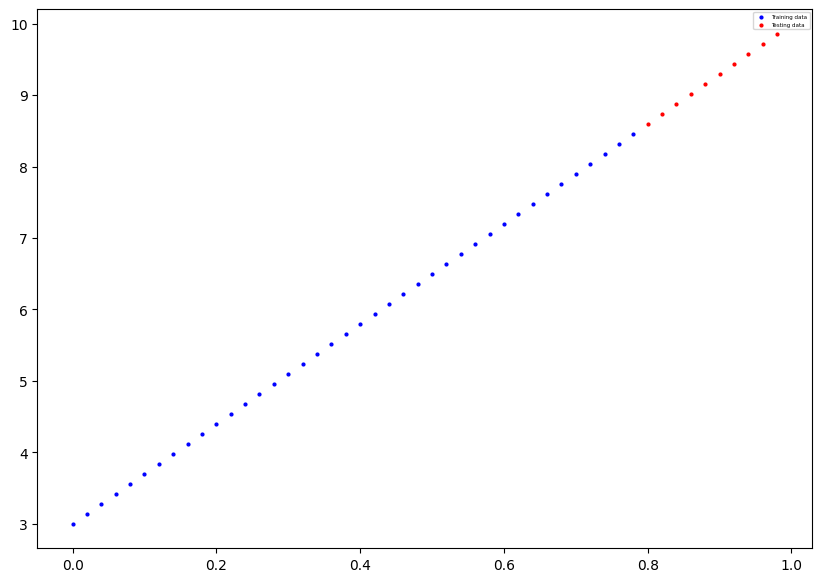

In [67]:
plot_predictions()

## 2. Building model

Out first PyTorch Model!


In [68]:
# create linear regression model class
import torch
from torch import nn

class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(
            1,
            requires_grad=True,
            dtype=torch.float
        ))
        self.bias = nn.Parameter(torch.randn(
            1,
            requires_grad=True,
            dtype=torch.float
        ))

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


### PyTorch building essentials

- torch.nn - contains all of the buildings for computational graphs ( a neural network can be considered a computational graph)
- torch.nn.Parameter - what parameters should our model try and learn, oftern a PyTorch layer from torch.nn will set these for use
- torch.nn.Module - The Base class for all neural network modules, if you subclass it, you should overwrite forward()
- torch.optim - this where the optimizer in PyTorch live, they will help with gradient descent
- def forward() - All nn.Module subclasses requires you to overwrite forward(), this method defines what happens in the forward computation.


In [69]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [70]:
# List name parameters

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

# making prediction using `torch.inference_mode()`

To chekc model's predictive power, let's seee how well it predicts `y_test` based on `x_test`

when we pass data through our model, it's going to run it throught the `forward()` method


In [71]:
# make predictions with model

with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

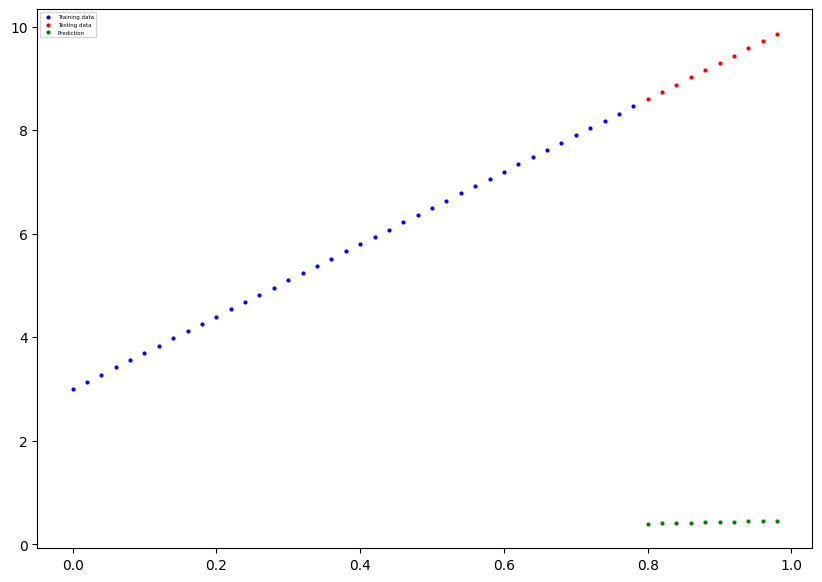

In [73]:
plot_predictions(predictions=y_preds)

# 3. Train Model

The whole idea of training is for a model to move forom some unknown parameters (these may be random) to some known parameters.

or in othere words from a poor representation of the data to a better representation of the data

one way to measure how poor or how wrong your models predictions are is to use a loss function.

- note: Loss function may also be called cost function or criterion in different areas. for our case, we're going to refer to it as a loss function.

- loss function: A function to measure how wrong your models predictions are to the ideal output, lower is better.
- Optimizer: takes into accounts the loss of a model and adjust the models parameteres to improve the loss function

and specifically for pytorch,we need
1.A training loop
2.A testing loop
